# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
data=pd.read_csv('D:\\Python Masterclass\\digital skola\\project kelompok\\garments_worker_productivity.csv')

 Business Understanding
1. analisa data dan hubungan antar data
2. Productivity Prediction of Garment Employees 

# Data Understanding & Preparation

##  Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
#mengetahui nilai yang unique
data.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [6]:
#merubah eror kata sweing menjadi sewing
data['department'] = data['department'].replace(['sweing'],['sewing'])

In [7]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Info Kolom :

In [8]:
#date = MM-DD-YYYY
#quarter = triwulan
#department = department
#day = hari
#team = Nomor tim terkait dengan instance 
#targeted_productivity = pencapaian yang di targertkan
#smv = Nilai Menit Standar, ini adalah waktu yang dialokasikan untuk suatu tugas
#wip = Pekerjaan sedang berlangsung. Termasuk jumlah item yang belum selesai untuk produk 
#over_time = jumlah perpanjangan waktu oleh masing-masing tim dalam hitungan menit 
#incentive = Merupakan jumlah insentif keuangan (dalam BDT) yang memungkinkan atau memotivasi tindakan tertentu. 
#idle_time = Jumlah waktu ketika produksi terganggu karena beberapa alasan
#idle_men = Jumlah pekerja yang menganggur karena gangguan produksi 
#no_of_style_change = Jumlah perubahan gaya produk tertentu 
#no_of_workers = Jumlah pekerja di setiap tim 
#actual_productivity = % produktivitas aktual yang dihasilkan oleh pekerja. Ini berkisar dari 0-1. 

##  Categorical Features

In [9]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

## Univariat Data

#### Quarter

In [10]:
data['quarter'].value_counts()
#terdapat 5 quarter. tidak terdistribusi merata

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

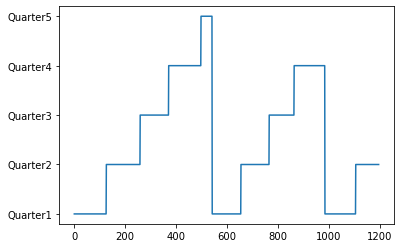

In [11]:
plt.plot(data.index,data.quarter)
plt.show()

#Ketika kami memeriksa tanggal, 
#dapat diamati bahwa ada pola yang berulang untuk semua kuartal dengan waktu kecuali Quarter5. 
#Kita perlu melihat ke Quarter5 secara mendalam. Seharusnya ada alasan untuk pengecualian

In [12]:
data_1=data[data['quarter']=='Quarter5']

In [13]:
data_1.shape

(44, 15)

In [14]:
data_1.date
#ternyata Quarter5 hanya tanggal 29 dan 31 januari 2015

498    1/29/2015
499    1/29/2015
500    1/29/2015
501    1/29/2015
502    1/29/2015
503    1/29/2015
504    1/29/2015
505    1/29/2015
506    1/29/2015
507    1/29/2015
508    1/29/2015
509    1/29/2015
510    1/29/2015
511    1/29/2015
512    1/29/2015
513    1/29/2015
514    1/29/2015
515    1/29/2015
516    1/29/2015
517    1/29/2015
518    1/31/2015
519    1/31/2015
520    1/31/2015
521    1/31/2015
522    1/31/2015
523    1/31/2015
524    1/31/2015
525    1/31/2015
526    1/31/2015
527    1/31/2015
528    1/31/2015
529    1/31/2015
530    1/31/2015
531    1/31/2015
532    1/31/2015
533    1/31/2015
534    1/31/2015
535    1/31/2015
536    1/31/2015
537    1/31/2015
538    1/31/2015
539    1/31/2015
540    1/31/2015
541    1/31/2015
Name: date, dtype: object

#### department

In [15]:
data.department.value_counts()

#terdapat 3  departement : sewing, finishing dan finishing 
#kita perlu menggabungkan 2 finishing sehingga menjadi 2 department

sewing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [16]:
data=data.replace(['finishing '], ['finishing'])  
data.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

#### day

In [17]:
data.day.value_counts() 
#jumat bukan hari kerja

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

## Numeric Features

In [18]:
data.select_dtypes(include=np.number).columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

#### 1. Team

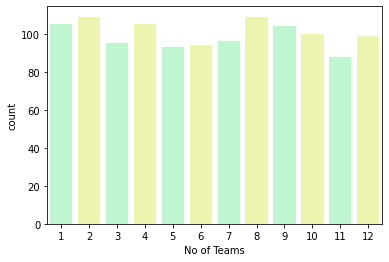

In [19]:
ax = sns.countplot(x = 'team', data = data, palette=["#B6FFCE", "#F6FFA4"])
plt.xlabel('No of Teams')
plt.show()

#Ada 12 tim. 
#Karena sangat diinginkan oleh para pengambil keputusan di industri garmen untuk melacak, 
#menganalisis, dan memprediksi kinerja produktivitas tim kerja di pabrik mereka, analisis saya akan berbasis tim. 

#### 2. WIP

In [20]:
data.wip.isnull().sum()

506

In [21]:
data['wip'] = data['wip'].fillna(0)

In [22]:
data.wip.isnull().sum()

0

In [23]:
data.index

RangeIndex(start=0, stop=1197, step=1)

([<matplotlib.axis.YTick at 0x1f6dbb22310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

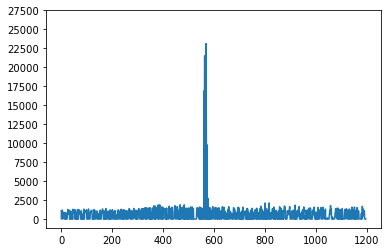

In [24]:
plt.plot(data.index,data.wip)
plt.yticks(np.arange(0,30000,step=2500))

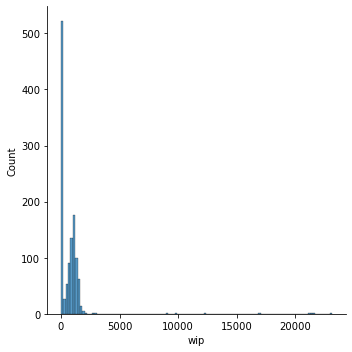

In [25]:
#coba menggunakan distribution plot.
sns.displot(data, x='wip')

In [26]:
data[data['wip']>2500].shape


(10, 15)

In [27]:
data[data['wip']>1083]

#terdapat 10 row yang memiliki WIP tinggi pada tanggal 2 feb 2015 dan Quarter1 di department sewing

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
26,1/3/2015,Quarter1,sewing,Saturday,8,0.80,26.16,1261.0,7080,50,0.0,0,0,59.0,0.800319
30,1/3/2015,Quarter1,sewing,Saturday,6,0.80,25.90,1152.0,6720,50,0.0,0,0,56.0,0.800125
31,1/3/2015,Quarter1,sewing,Saturday,7,0.80,25.90,1138.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3/10/2015,Quarter2,sewing,Tuesday,9,0.75,18.79,1247.0,6240,45,0.0,0,0,52.0,0.750396
1166,3/10/2015,Quarter2,sewing,Tuesday,6,0.70,23.41,1180.0,4560,30,0.0,0,1,38.0,0.700246
1183,3/11/2015,Quarter2,sewing,Wednesday,10,0.75,21.82,1674.0,6000,34,0.0,0,0,50.0,0.750608
1186,3/11/2015,Quarter2,sewing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051


In [28]:
data.wip.describe()

count     1197.000000
mean       687.228070
std       1514.582341
min          0.000000
25%          0.000000
50%        586.000000
75%       1083.000000
max      23122.000000
Name: wip, dtype: float64

<AxesSubplot:xlabel='wip'>

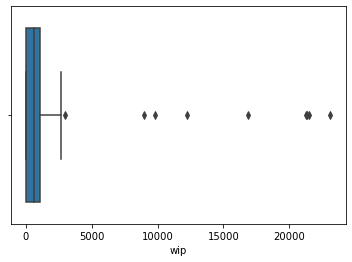

In [29]:
sns.boxplot(x=data["wip"])

In [30]:
data.wip.median()

586.0

#### 5. Incentive

In [31]:
data.incentive.describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

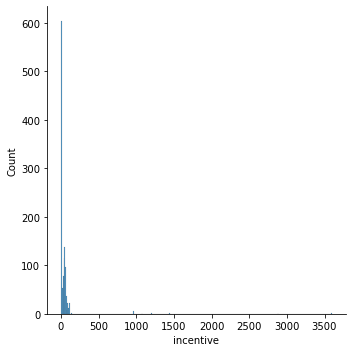

In [32]:
#coba menggunakan distribution plot.
sns.displot(data, x='incentive')

#### Actual Productivity

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

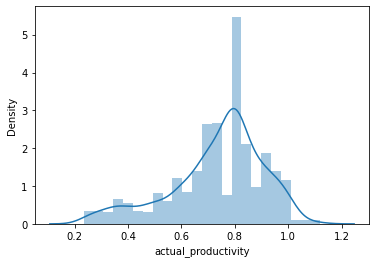

In [33]:
sns.distplot(data.actual_productivity)

#### Target Productivity

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='targeted_productivity', ylabel='Density'>

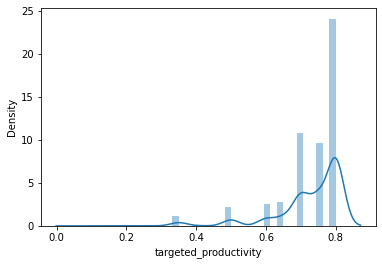

In [34]:
sns.distplot(data['targeted_productivity'])

In [35]:
data.targeted_productivity.value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

## Bivariat Data

#### 1. SMV VS Team

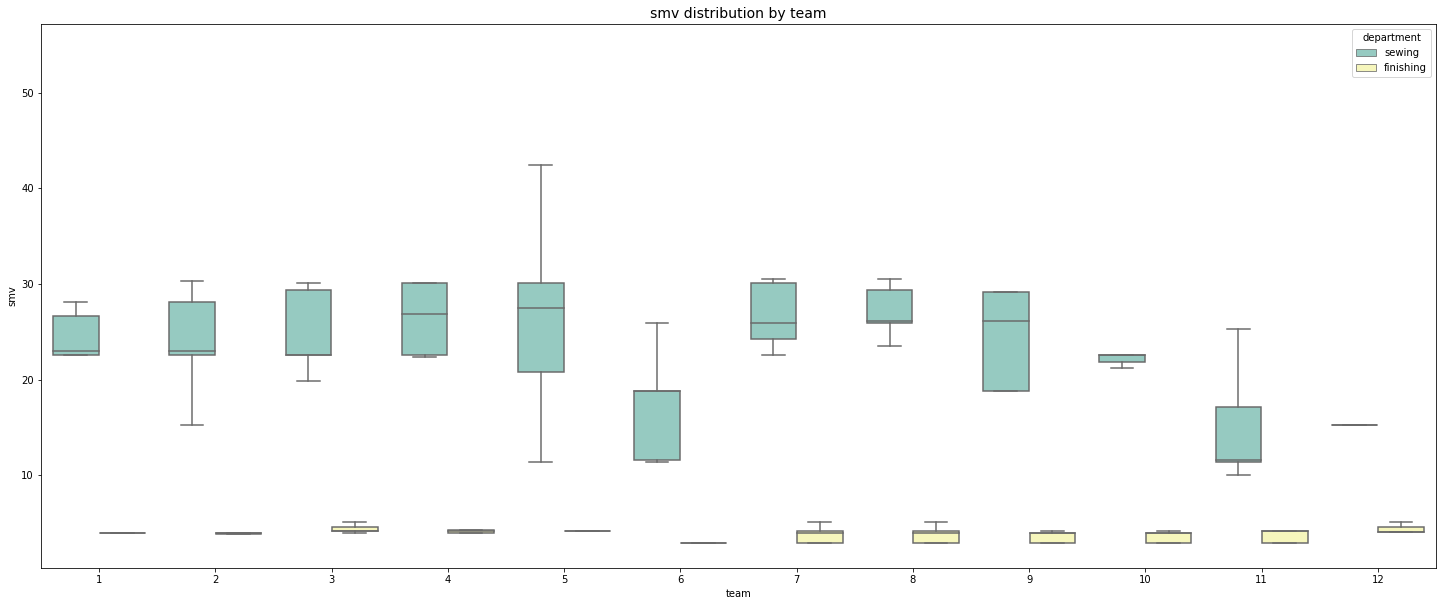

In [36]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = data,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

#Ketika kita melihat boxplot smv berdasarkan tim dengan pemisahan departemen, 
#dapat dilihat dengan jelas bahwa sementara ada fluktuasi antar tim di departemen sewing, 
#departemen finishing memiliki nilai smv yang hampir merata untuk setiap tim. 

#### 2. SMV VS no_of_workers

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

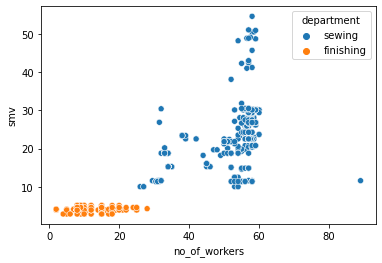

In [37]:
sns.scatterplot(data=data, x="no_of_workers", y="smv", hue="department")
#Untuk departemen finishing smv tidak berubah dengan no_of_workers 

#### 3. wip VS department

<AxesSubplot:xlabel='department', ylabel='wip'>

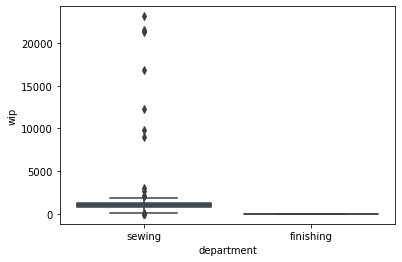

In [38]:
sns.boxplot(x='department',y='wip',data=data)

#ketika sewing melakukan pekerjaan, finishing tidak melakukan kegiatan sehingga bisa di isi dengan nilai 0

#### 4.Over Time VS departement

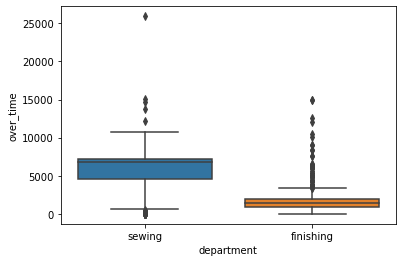

In [39]:
sns.boxplot(x='department',y='over_time',data=data)
plt.show()

#### 5.Over Time VS team

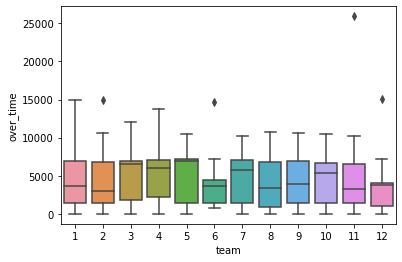

In [40]:
sns.boxplot(x='team',y='over_time',data=data)
plt.show()

#### 5.Over Time VS departement & team

In [41]:
over_time_by_team_department = data.groupby(['department', 'team']).mean()['over_time']

for team in range(1, 13):
    for department in ['sewing', 'finishing']:
        print('Mean over_time of team {} {}s: {}'.format(team,department, over_time_by_team_department[department][team]))
print('Mean over_time of teams: {}'.format(data['over_time'].mean()))

Mean over_time of team 1 sewings: 7335.535714285715
Mean over_time of team 1 finishings: 1888.1632653061224
Mean over_time of team 2 sewings: 6575.789473684211
Mean over_time of team 2 finishings: 1983.4615384615386
Mean over_time of team 3 sewings: 7035.0
Mean over_time of team 3 finishings: 2774.5945945945946
Mean over_time of team 4 sewings: 7547.796610169492
Mean over_time of team 4 finishings: 2758.695652173913
Mean over_time of team 5 sewings: 7271.379310344828
Mean over_time of team 5 finishings: 2115.4285714285716
Mean over_time of team 6 sewings: 4461.610169491525
Mean over_time of team 6 finishings: 1527.4285714285713
Mean over_time of team 7 sewings: 7064.181818181818
Mean over_time of team 7 finishings: 1896.5853658536585
Mean over_time of team 8 sewings: 6896.785714285715
Mean over_time of team 8 finishings: 1581.5094339622642
Mean over_time of team 9 sewings: 7103.793103448276
Mean over_time of team 9 finishings: 1260.0
Mean over_time of team 10 sewings: 6794.210526315789

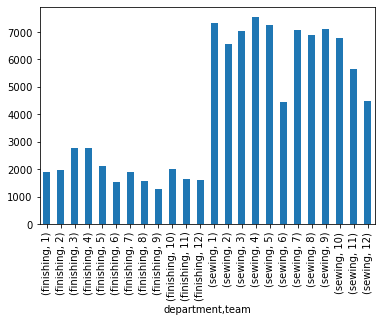

In [42]:
over_time_by_team_department.plot.bar()
plt.show()

In [43]:
over_time_by_team_department.head()

#Departemen finishing memiliki nilai over_time yang relatif lebih rendah dibanding departemen sweing. 
#Di departemen sweing team6, team11 dan team12 memiliki nilai over_time terendah. 

department  team
finishing   1       1888.163265
            2       1983.461538
            3       2774.594595
            4       2758.695652
            5       2115.428571
Name: over_time, dtype: float64

#### 6. over time VS date

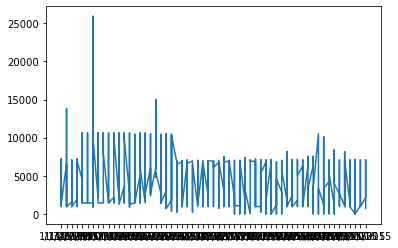

In [44]:
plt.plot(data.date,data.over_time)

In [45]:
data[data['over_time']>12000].shape

(8, 15)

In [46]:
data[data['over_time']>12000]

#tidak ada korelasi antara data over time dengan tanggal

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
36,1/3/2015,Quarter1,sewing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
127,1/8/2015,Quarter2,finishing,Thursday,4,0.80,3.94,0.0,12600,0,0.0,0,0,20.0,0.919905
138,1/8/2015,Quarter2,sewing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107
139,1/8/2015,Quarter2,sewing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30.5,0.800025
146,1/8/2015,Quarter2,sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
377,1/22/2015,Quarter4,sewing,Thursday,1,0.70,22.94,1384.0,12180,63,0.0,0,0,57.0,0.750162
383,1/22/2015,Quarter4,finishing,Thursday,1,0.70,3.94,0.0,15000,0,0.0,0,0,25.0,0.649662
384,1/22/2015,Quarter4,finishing,Thursday,2,0.70,3.94,0.0,15000,0,0.0,0,0,25.0,0.649662


#### 7. incentive VS date

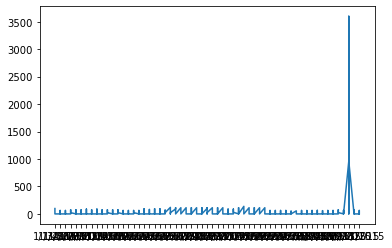

In [47]:
plt.plot(data.date,data.incentive)

In [48]:
data[data['incentive']>500].shape

(10, 15)

In [49]:
data[data['incentive']>500]
#10 incentive tertinggi bearada pada bulan terjadi pada tanggal 3 maret 2022, department finishig dengan overtime 0.

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1128,3/9/2015,Quarter2,finishing,Monday,11,0.80,2.90,0.0,0,960,0.0,0,0,8.0,0.960625
1129,3/9/2015,Quarter2,finishing,Monday,12,0.80,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963
1130,3/9/2015,Quarter2,finishing,Monday,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343
1133,3/9/2015,Quarter2,finishing,Monday,9,0.75,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000
1137,3/9/2015,Quarter2,finishing,Monday,3,0.80,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417
1138,3/9/2015,Quarter2,finishing,Monday,4,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.795388
1139,3/9/2015,Quarter2,finishing,Monday,1,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.794567
1143,3/9/2015,Quarter2,finishing,Monday,2,0.70,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500
1148,3/9/2015,Quarter2,finishing,Monday,10,0.70,2.90,0.0,0,960,0.0,0,0,8.0,0.477292
1149,3/9/2015,Quarter2,finishing,Monday,8,0.65,3.90,0.0,0,960,0.0,0,0,8.0,0.264062


#### 8. Idle Time VS date

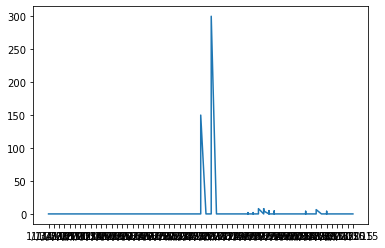

In [50]:
plt.plot(data.date,data.idle_time)

<AxesSubplot:xlabel='date', ylabel='idle_time'>

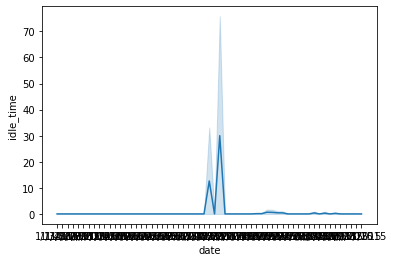

In [51]:
sns.lineplot(data=data, x="date", y="idle_time")

#lebih baik menggunakan line chart(seaborn). bisa di split per quarter.

In [52]:
data[data['idle_time']>100].shape

(3, 15)

In [53]:
data[data['idle_time']>100]

#idle time > 100 terjadi pada tanggal 7 februari 2015 di department sewing Quarter1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
617,2/4/2015,Quarter1,sewing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sewing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sewing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


#### 9. Idle Men VS date

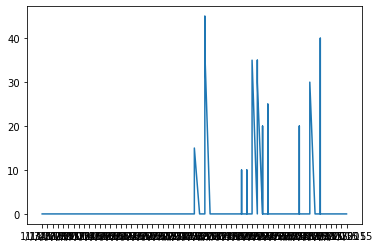

In [54]:
plt.plot(data.date,data.idle_men)

<AxesSubplot:xlabel='date', ylabel='idle_men'>

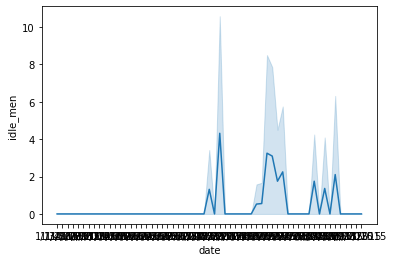

In [55]:
sns.lineplot(data=data, x="date", y="idle_men")

#lebih baik menggunakan line chart(seaborn). bisa di split per quarter.

In [56]:
data[data['idle_men']>=1].shape

(18, 15)

In [57]:
data[data['idle_men']>=1]
#semua idle_men berada pada department sewing

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sewing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sewing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sewing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sewing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sewing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sewing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sewing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sewing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sewing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sewing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


#### 10. No_of_style_change VS Date

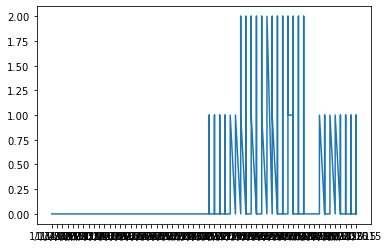

In [58]:
plt.plot(data.date,data.no_of_style_change)

#### 11. No_of_style_change VS department & quarter

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


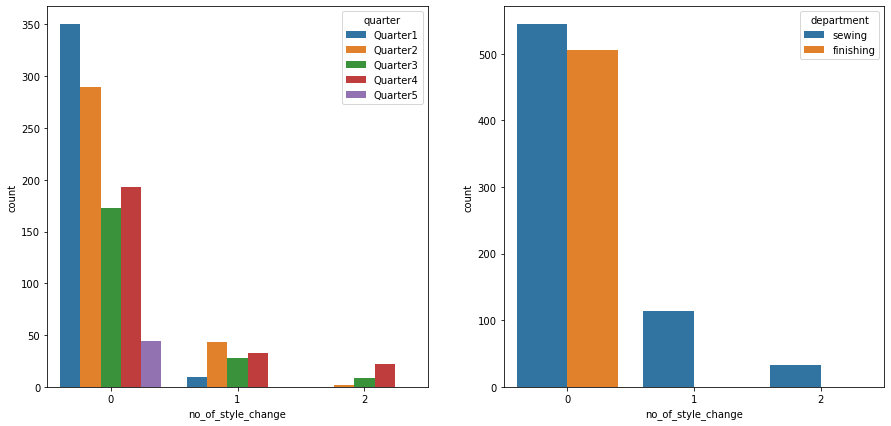

In [59]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1,2,1)
sns.countplot('no_of_style_change',hue='quarter',data=data)
plt.xlabel('no_of_style_change')

plt.subplot(1,2,2)
sns.countplot('no_of_style_change',hue='department',data=data)
plt.xlabel('no_of_style_change')

plt.show()

#tidak ada no_of_style_change pada Quarter5 dan departement finishing

#### 11. No_of_workers VS department

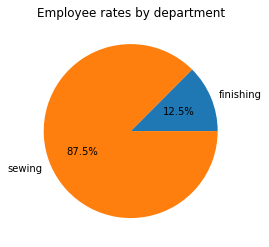

In [60]:
data1=data.groupby(['department']).no_of_workers.sum()
data1.plot.pie(title='Employee rates by department',autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

#jumlah pekerja pada department


#### 12. actual productivity vs date

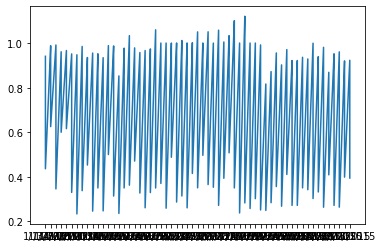

In [61]:
plt.plot(data.date,data.actual_productivity)

#tidak ada relasi antara tanggal dengan actual_productivity


#### 13. actual productivity vs departement & team

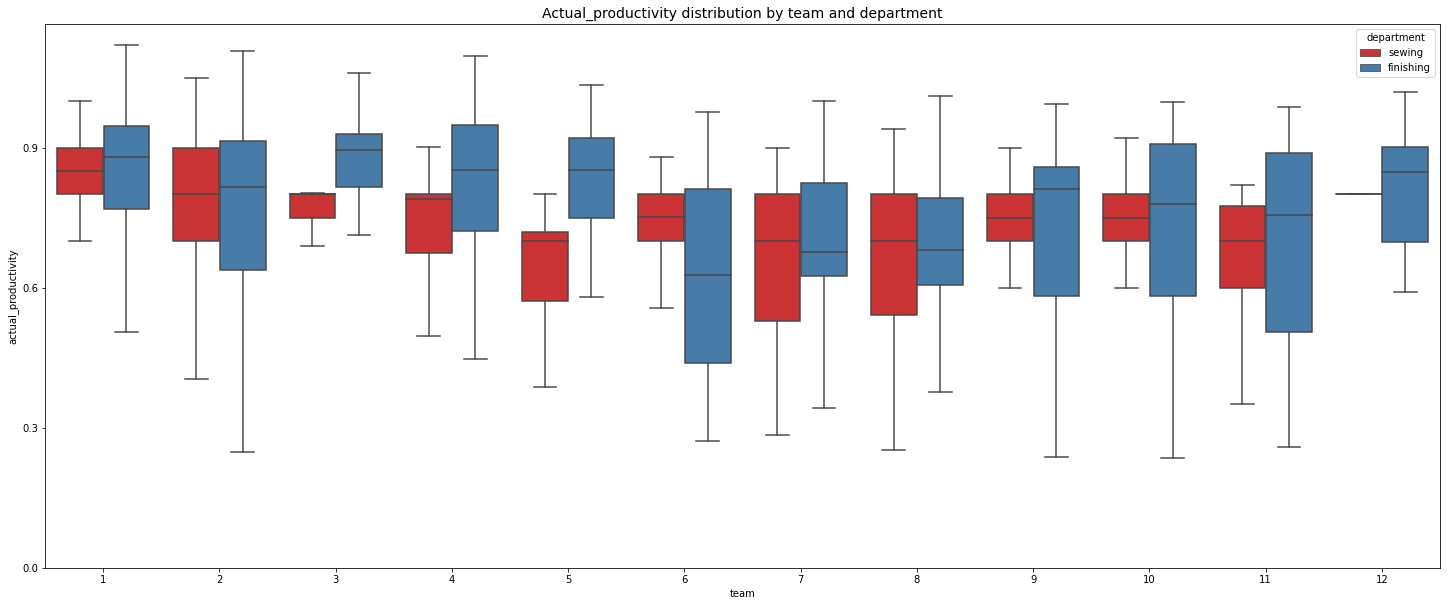

In [62]:
plt.figure(figsize=(25, 10))
palette = "Set1"

sns.boxplot(x = 'team', y = 'actual_productivity', data = data,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()


#### 14. actual productivity vs date

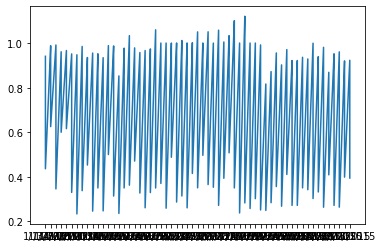

In [63]:
plt.plot(data.date,data.actual_productivity)
#tidak ditemukan hubungan antara waktu dan Target Productivity


#### 15. target productivity vs team & departement

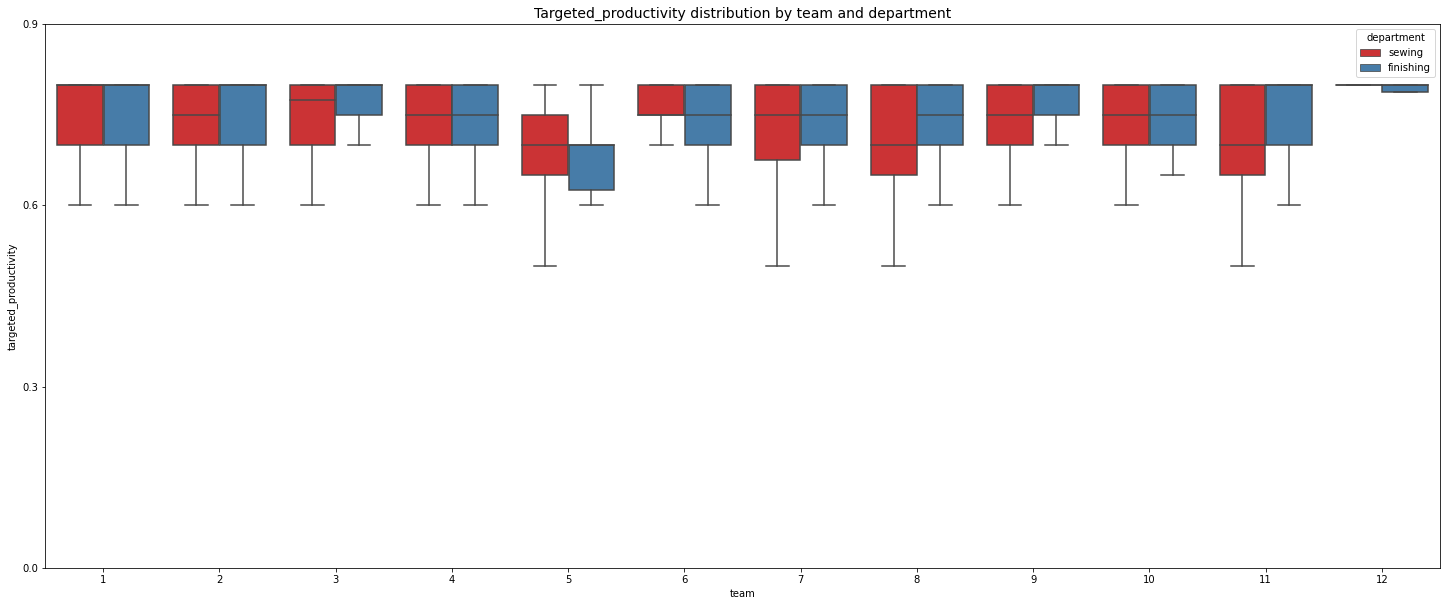

In [64]:
plt.figure(figsize=(25, 10))
palette = "Set1"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = data,
     palette = palette, hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()


#Target productivity berbeda pada team 5 dari ke 2 departemen


#### 16. target productivity vs actual productivity

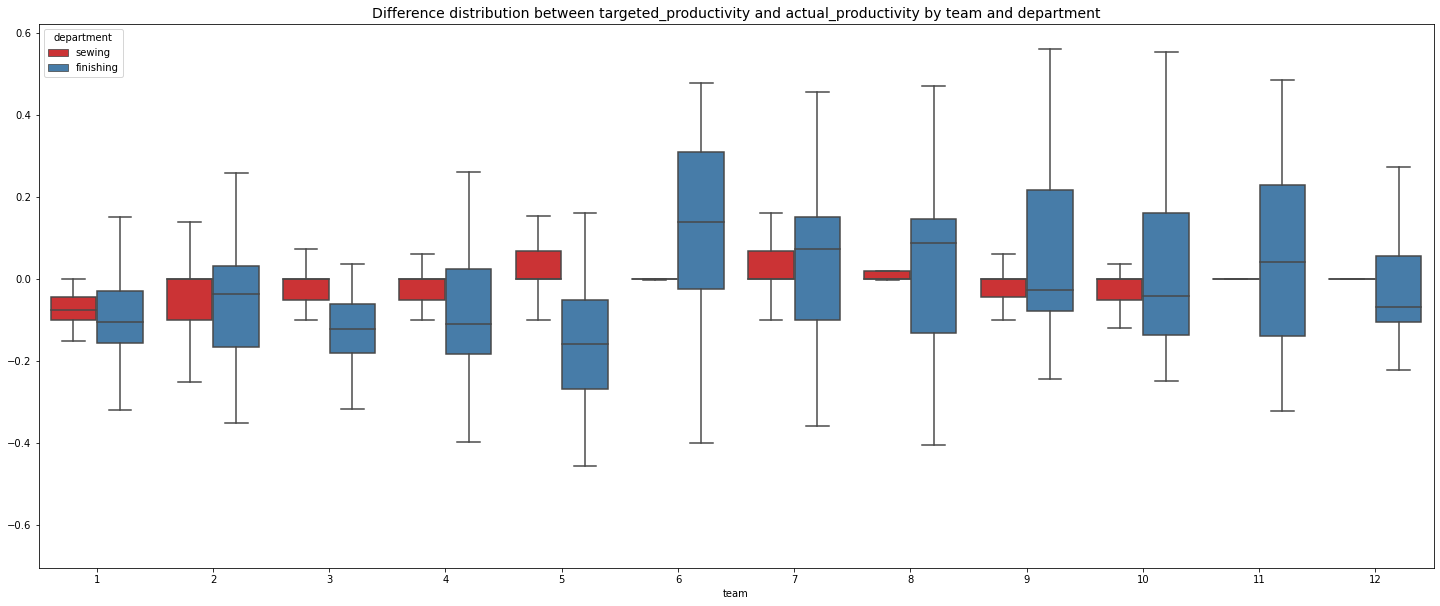

In [65]:
plt.figure(figsize=(25, 10))
palette = "Set1"

sns.boxplot(x = 'team', y = data.targeted_productivity-data.actual_productivity, data = data,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

##terdapat nilai negatif pada grafik yang artinya grafik tidak tercapai

## Correlation Map Antar Variable

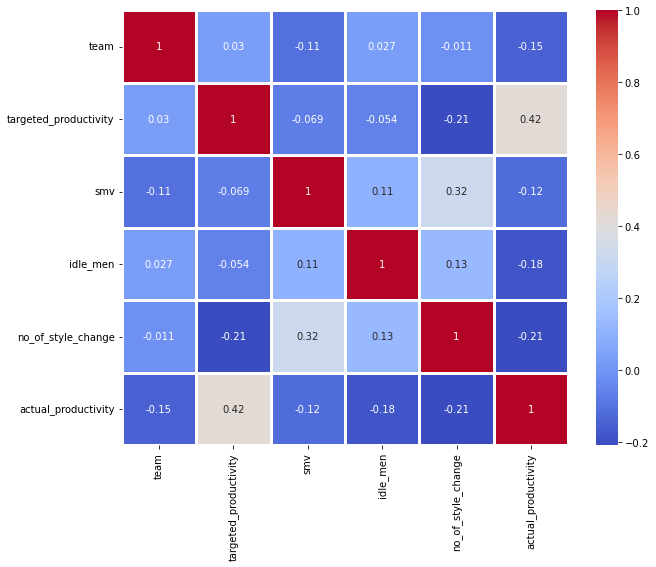

In [66]:
hig_corr = data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["actual_productivity"]) >= 0.095]

plt.figure(figsize=(10,8))
ax = sns.heatmap(data[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

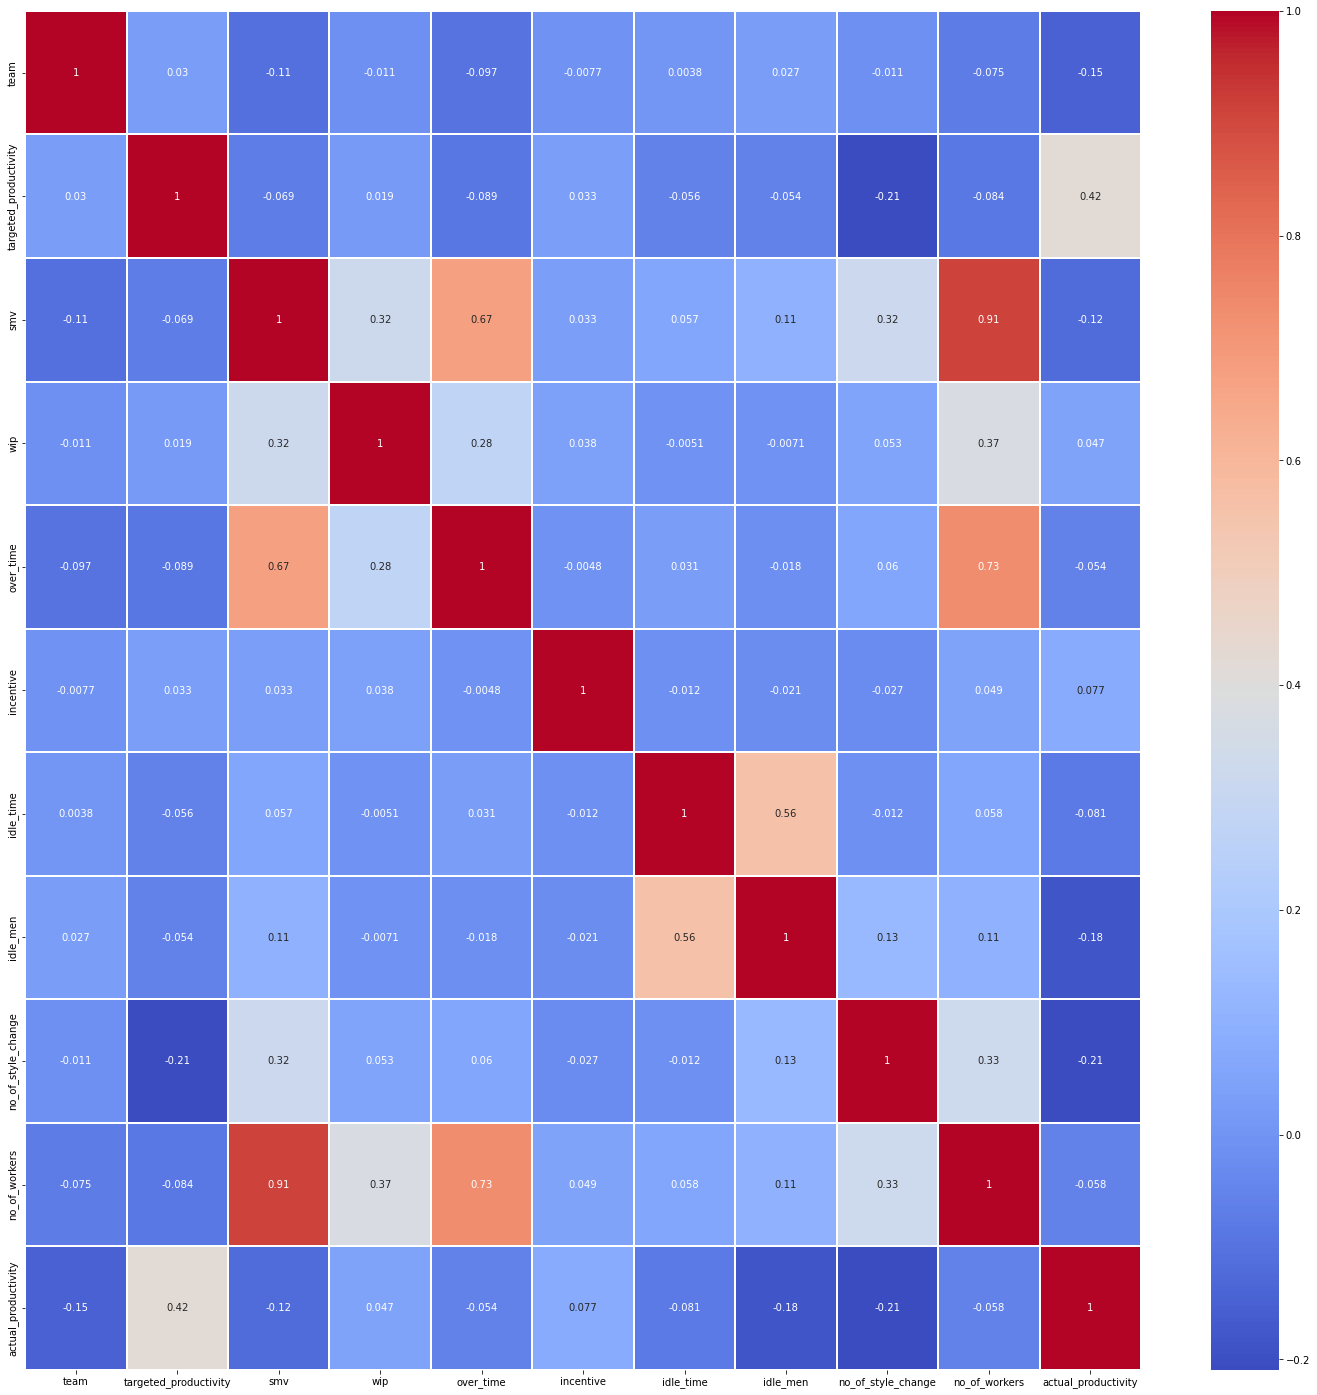

In [67]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(data.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# DATA PREPARATION

#### Check duplicate values

In [68]:
data[data.duplicated(keep=False)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


#### dropping duplicate values

In [69]:
data = data.drop_duplicates()
data = data.reset_index(drop = True)

In [70]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### checking for missing values

In [71]:
data.isnull()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
data[data.isnull().any(axis = 1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [73]:
#checking number of missing value
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

KOLOM UNTUK BIKIN TRASHOLD. NOTEBOOK D PISAH DARI NOMER 74. INI UNTUK KLASIFIKASI

## Cek rataan dan simpangan baku distribusi target variabel

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.74 and sigma = 0.17



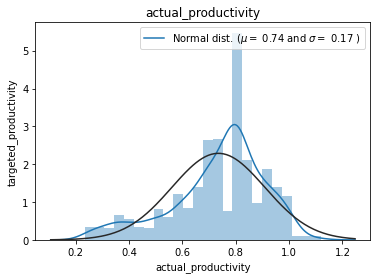

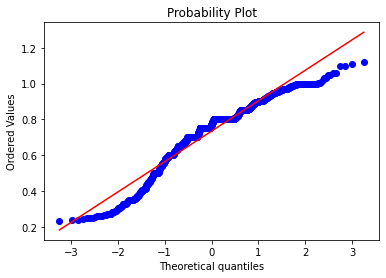

In [74]:
sns.distplot(data['actual_productivity'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(data['actual_productivity'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('targeted_productivity')
plt.title('actual_productivity')

# QQ-plot
fig = plt.figure()
res = stats.probplot(data['actual_productivity'], plot=plt)
plt.show()

## Transformasi log pada target variabel

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.55 and sigma = 0.11



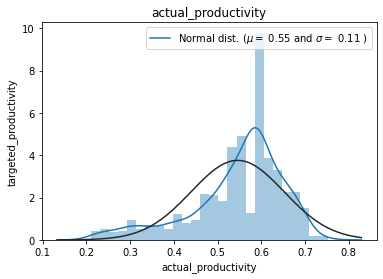

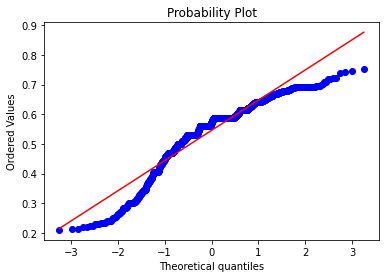

In [75]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["actual_productivity"] = np.log1p(data["actual_productivity"])

# Check the new distribution 
sns.distplot(data['actual_productivity'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(data['actual_productivity'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('targeted_productivity')
plt.title('actual_productivity')

#QQ Plot
fig = plt.figure()
res = stats.probplot(data['actual_productivity'], plot=plt)
plt.show()

#### ONE HOT ENCODER

#### Label Encoding

In [76]:
data['date'] = pd.to_datetime(data['date'])
#Setting date column as index
data.set_index('date', drop = False, inplace=True)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.663062
2015-01-01,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.634723
2015-01-01,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.588104
2015-01-01,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.588104
2015-01-01,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.587999


In [77]:
data['month'] = data['date'].dt.month_name() 

In [78]:
data[['quarter', 'department', 'day', 'team','no_of_style_change','month']]

,quarter,department,day,team,no_of_style_change,month
date,,,,,,
2015-01-01,Quarter1,sewing,Thursday,8,0,January
2015-01-01,Quarter1,finishing,Thursday,1,0,January
2015-01-01,Quarter1,sewing,Thursday,11,0,January
2015-01-01,Quarter1,sewing,Thursday,12,0,January
2015-01-01,Quarter1,sewing,Thursday,6,0,January
...,...,...,...,...,...,...
2015-03-11,Quarter2,finishing,Wednesday,10,0,March
2015-03-11,Quarter2,finishing,Wednesday,8,0,March
2015-03-11,Quarter2,finishing,Wednesday,7,0,March


In [79]:
data=data.drop('date', axis='columns')

In [80]:
def create_dummies(data,column_name):
    dummies = pd.get_dummies(data[column_name],prefix=column_name)
    data = pd.concat([data,dummies],axis=1)
    return data

data = create_dummies(data,"quarter")
data = create_dummies(data,"department")
data = create_dummies(data,"day")
data = create_dummies(data,"team")

data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

In [81]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time', 'idle_men']
min_max_scaler = MinMaxScaler()
data[cols_to_scale] = min_max_scaler.fit_transform(data[cols_to_scale])
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sewing,Thursday,8,0.80,0.450252,0.047920,0.273148,0.027222,0.0,...,0,0,0,0,0,1,0,0,0,0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.037037,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01,Quarter1,sewing,Thursday,11,0.80,0.164731,0.041865,0.141204,0.013889,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-01,Quarter1,sewing,Thursday,12,0.80,0.164731,0.041865,0.141204,0.013889,0.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01,Quarter1,sewing,Thursday,6,0.80,0.445219,0.050601,0.074074,0.013889,0.0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

## Cek top 10 skewness

In [83]:
from scipy.stats import norm, skew

numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
idle_time,20.519670
incentive,15.770951
wip,10.838782
idle_men,9.842725
quarter_Quarter5,4.923688
team_11,3.268275
team_5,3.155187
team_6,3.133571
team_3,3.112267
team_7,3.091269


## Ubah skewness yang lebih dari 0,75 dengan boxcox

In [84]:
#LAMBDANYA COBA DI UBAH UBAH NILAINYA

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 3
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

There are 36 skewed numerical features to Box Cox transform


## Cek kembali skewness

In [85]:
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
idle_time,22.432486
incentive,20.895455
wip,13.859225
idle_men,11.297750
quarter_Quarter5,4.923688
no_of_style_change,4.304347
team_11,3.268275
team_5,3.155188
team_6,3.133570
team_3,3.112267


## Dummy Variable

In [86]:
data = pd.get_dummies(data)
print(data.shape)

(1197, 52)


## Scaling

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [88]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time', 'idle_men']
min_max_scaler = MinMaxScaler()
data[cols_to_scale] = min_max_scaler.fit_transform(data[cols_to_scale])
data.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_sewing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_February,month_January,month_March
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,242.666667,1.610667,0.292888,0.021537,0.151951,0.011987,0.0,0.0,0.0,0.504929,...,1,0,0,0,1,0,0,0,1,0
2015-01-01,2.333333,1.453125,0.008803,0.000000,0.016468,0.000000,0.0,0.0,0.0,0.031642,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,575.666667,1.610667,0.082867,0.018704,0.069463,0.006035,0.0,0.0,0.0,0.191407,...,1,0,0,0,1,0,0,0,1,0
2015-01-01,732.000000,1.610667,0.082867,0.018704,0.069463,0.006035,0.0,0.0,0.0,0.191407,...,1,0,0,0,1,0,0,0,1,0
2015-01-01,114.000000,1.610667,0.288367,0.022802,0.034156,0.006035,0.0,0.0,0.0,0.465280,...,1,0,0,0,1,0,0,0,1,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   float64
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   float64
 5   incentive              1197 non-null   float64
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   float64
 8   no_of_style_change     1197 non-null   float64
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  quarter_Quarter1       1197 non-null   float32
 12  quarter_Quarter2       1197 non-null   float32
 13  quarter_Quarter3       1197 non-null   float32
 14  quarter_Quarter4       1197 non-null  

In [90]:
X, y = data.drop(['actual_productivity'], axis=1), data['actual_productivity']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

(837, 51)


In [92]:
input_shape = 51

In [93]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
# Creating an estimator
ridge = Ridge()
# Creating RFE object 
rfe = RFE(estimator = ridge, n_features_to_select = input_shape, verbose = 1)
# Fitting the training data into our model
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('team', True, 1),
 ('targeted_productivity', True, 1),
 ('smv', True, 1),
 ('wip', True, 1),
 ('over_time', True, 1),
 ('incentive', True, 1),
 ('idle_time', True, 1),
 ('idle_men', True, 1),
 ('no_of_style_change', True, 1),
 ('no_of_workers', True, 1),
 ('quarter_Quarter1', True, 1),
 ('quarter_Quarter2', True, 1),
 ('quarter_Quarter3', True, 1),
 ('quarter_Quarter4', True, 1),
 ('quarter_Quarter5', True, 1),
 ('department_finishing', True, 1),
 ('department_sewing', True, 1),
 ('day_Monday', True, 1),
 ('day_Saturday', True, 1),
 ('day_Sunday', True, 1),
 ('day_Thursday', True, 1),
 ('day_Tuesday', True, 1),
 ('day_Wednesday', True, 1),
 ('team_1', True, 1),
 ('team_2', True, 1),
 ('team_3', True, 1),
 ('team_4', True, 1),
 ('team_5', True, 1),
 ('team_6', True, 1),
 ('team_7', True, 1),
 ('team_8', True, 1),
 ('team_9', True, 1),
 ('team_10', True, 1),
 ('team_11', True, 1),
 ('team_12', True, 1),
 ('quarter_Quarter1', True, 1),
 ('quarter_Quarter2', True, 1),
 ('quarter_Quarter3

In [94]:


# Let us look at the columns which have been supported by the RFE
RFE_ridge_support_columns = X_train.columns[rfe.support_]
RFE_ridge_support_columns



Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sewing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'month_February', 'month_January', 'month_March'],
      dtype='object')

In [95]:
# Preparing a new dataset containing only the RFE support columns data
X_train = X_train[RFE_ridge_support_columns]
X_train.head()
# Preparing a new dataset containing only the RFE support columns data
X_test = X_test[RFE_ridge_support_columns]
X_test.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Sunday,day_Thursday,day_Thursday,day_Tuesday,day_Tuesday,day_Wednesday,day_Wednesday,month_February,month_January,month_March
date,,,,,,,,,,,,,,,,,,,,,
2015-03-01,575.666667,1.610667,0.085126,0.006529,0.000000,0.006035,0.005791,0.287674,0.000000,0.478311,...,1,0.000000,0,0.000000,0,0.0,0,0,0,1
2015-02-17,8.666667,1.610667,0.019310,0.000000,0.031877,0.000000,0.000000,0.000000,0.000000,0.074085,...,0,0.000000,0,2.333333,1,0.0,0,1,0,0
2015-02-10,41.333333,1.304333,0.365313,0.016441,0.150345,0.004815,0.000000,0.000000,2.333333,0.491527,...,0,0.000000,0,2.333333,1,0.0,0,1,0,0
2015-02-03,242.666667,1.304333,0.260569,0.026782,0.140837,0.000000,0.000000,0.000000,0.000000,0.458833,...,0,0.000000,0,2.333333,1,0.0,0,1,0,0
2015-01-01,732.000000,1.610667,0.082867,0.018704,0.069463,0.006035,0.000000,0.000000,0.000000,0.191407,...,0,2.333333,1,0.000000,0,0.0,0,0,1,0


## Metrics


In [96]:
from sklearn import metrics
models_metrics = pd.DataFrame(columns = [ 'models','mae','mse', 'rmse' ,'mape', 'R2'])
def evaluate_model(model,Y_actual,Y_Predicted, df): 
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    rmse=np.sqrt(metrics.mean_squared_error(Y_actual, Y_Predicted))
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'models':model,'mae':mae,'mse':mse, 'rmse':rmse, 'mape':mape, 'R2': r2}
    df = df.append(df2, ignore_index = True)
    return df

## MODELING

In [97]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

In [99]:
LR = linear_model.LinearRegression()
test_model(LR)

[0.25441576846334985]

In [100]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.2538322943564928]

In [101]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.24681056558708087]

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.46735340760026123]

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[-0.026380106297262118]

In [104]:
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
test_model(gbr_reg)

C:\Users\rbagaspanges\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\rbagaspanges\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\rbagaspanges\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\rbagaspanges\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[0.3711145693883664]

## Linear Regression Model

In [106]:
# Building a model
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
#Prediction using test set 
y_linear_pred = model_linear.predict(X_test)
models_metrics = evaluate_model('Linear Regression', y_test, y_linear_pred, models_metrics)
linear_model

<module 'sklearn.linear_model' from 'C:\\Users\\rbagaspanges\\Anaconda3\\lib\\site-packages\\sklearn\\linear_model\\__init__.py'>

In [107]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

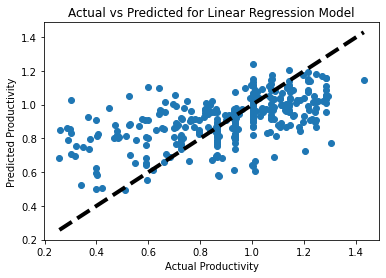

In [108]:
plt.scatter(y_test, y_linear_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Linear Regression Model")
plt.show()

## Lasso Model

In [109]:
# Building a model
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
#Prediction using test set 
y_lasso_pred = model_lasso.predict(X_test)
models_metrics = evaluate_model('Lasso Regression', y_test, y_lasso_pred, models_metrics)

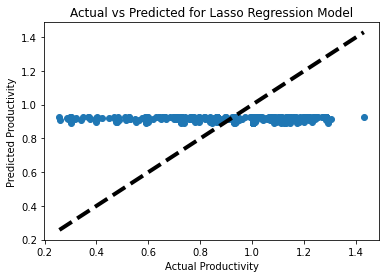

In [110]:
plt.scatter(y_test, y_lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Lasso Regression Model")
plt.show()

## Ridge Model

In [111]:


# Building a model
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
#Prediction using test set 
y_ridge_pred = model_ridge.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Ridge Regression', y_test, y_ridge_pred, models_metrics)



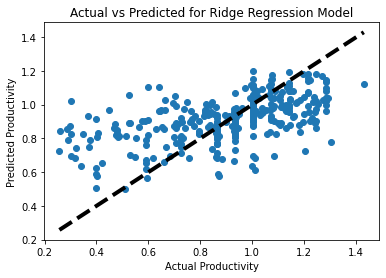

In [112]:
plt.scatter(y_test, y_ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Ridge Regression Model")
plt.show()

## Random Forest

In [113]:
# Building a model
model_rf = RandomForestRegressor(n_estimators = 100 ,  random_state = 10)
model_rf.fit(X_train,y_train)
#Prediction using test set 
y_rf_pred = model_rf.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Random Forest Regression', y_test, y_rf_pred, models_metrics)

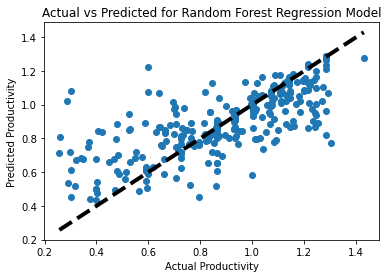

In [114]:
plt.scatter(y_test, y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Random Forest Regression Model")
plt.show()

## DecisionTree Regressor

In [115]:
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(X_train,y_train)
#Prediction using test set 
y_dt_pred = model_dt.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Decision Tree Regression', y_test, y_dt_pred, models_metrics)

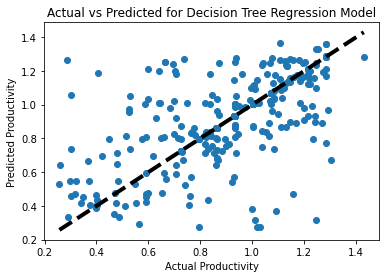

In [116]:
plt.scatter(y_test, y_dt_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Decision Tree Regression Model")
plt.show()

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

model_gbr.fit(X_train, y_train)
y_gbr_pred = model_gbr.predict(X_test)
models_metrics = evaluate_model('Gradient Boost', y_test, y_gbr_pred, models_metrics)

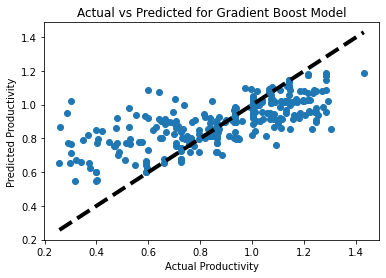

In [118]:
plt.scatter(y_test, y_gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Gradient Boost Model")
plt.show()

In [121]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.148528,0.040404,0.201008,22.454459,0.321961
1,Lasso Regression,0.190989,0.059429,0.243781,29.208400,0.002703
2,Ridge Regression,0.149314,0.041011,0.202512,22.736131,0.311783
3,Random Forest Regression,0.103794,0.027665,0.166328,16.286110,0.535745
4,Decision Tree Regression,0.124663,0.046592,0.215853,18.025146,0.218118
5,Gradient Boost,0.117569,0.029991,0.173179,18.650320,0.496714
